# <center> <h1>   🌲🌳🌲🌳🌲   🧑‍💻   🌲🌳🌲🌳🌲

# <center> Random Forest

* For regression
* For classification

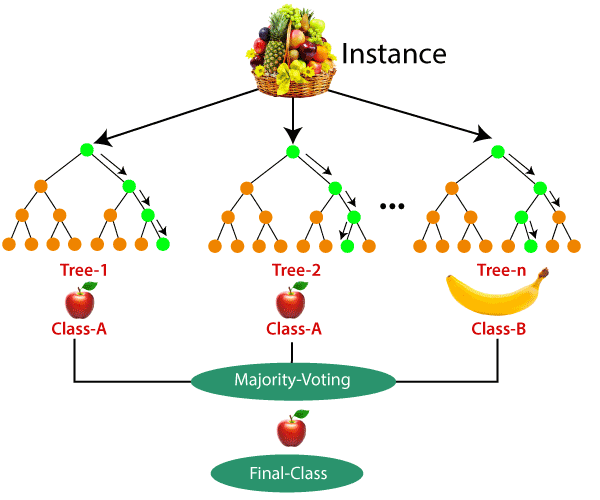

Random forest
In a random forest, several trees make a decision (and in a decision tree, one tree makes a decision)

For example, if we have a regression problem, if we have 100 trees in a random forest, it will return 100 different answers, which one should we take?
We average the values returned from 100 trees

For example, if we have a problem of classification in a random forest, if there are 100 trees, it will return 100 different answers, which one should we get?
The values returned from 100 trees are found by voting, that is, if 70 trees are apples and 30 trees are bananas, they will be called apples (because the most votes are for apples).

If in the classification we have, for example, 50 apples and 50 bananas out of 100 trees, this will be an equality. To prevent this, we can correct the decision tree again

`(Random forest divides the data into different sub-datasets, so if we have 50 trees, each tree consists of different sub-datasets)`

`Random Forest works by Decision Tree, i.e. if there are 50 trees in Random Forest, each of them works according to decision tree rule (column with high STDR makes decision 1)`


In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# <center> Random Forest Classifier

In [2]:
data = pd.read_csv("Datasets/DTree2.csv")
data

,Weather,Temp,Humidity,Wind,Players
0,Rainy,Hot,High,False,25
1,Rainy,Hot,High,True,30
2,Cloudy,Hot,High,False,46
3,Sunny,Good,High,False,45
4,Sunny,Cool,Normal,False,52
5,Sunny,Cool,Normal,True,23
6,Cloudy,Cool,Normal,True,43
7,Rainy,Good,High,False,35
8,Rainy,Cool,Normal,False,38
9,Sunny,Good,Normal,False,46


In [3]:
ordinal = OrdinalEncoder()
ordinal
# needed to encode the data

OrdinalEncoder()

In [4]:
data_x = ordinal.fit(data.drop("Players", axis=1))
data_x

OrdinalEncoder()

In [5]:
data_x = ordinal.transform(data.drop("Players", axis=1))
data_x
# We encoded the data

array([[1., 2., 0., 0.],
       [1., 2., 0., 1.],
       [0., 2., 0., 0.],
       [2., 1., 0., 0.],
       [2., 0., 1., 0.],
       [2., 0., 1., 1.],
       [0., 0., 1., 1.],
       [1., 1., 0., 0.],
       [1., 0., 1., 0.],
       [2., 1., 1., 0.],
       [1., 1., 1., 1.],
       [0., 1., 0., 1.],
       [0., 2., 1., 0.],
       [2., 1., 0., 1.]])

In [7]:
# because our data is intended for regression
# we'll adjust it manually for classification
for i in range(len(data)):
    print(data.loc[i,"Players"])
    data.loc[i,"Players"] = int(input("= "))
    

25
= 0
30
= 1
46
= 1
45
= 1
52
= 0
23
= 0
43
= 0
35
= 1
38
= 1
46
= 1
48
= 0
52
= 1
44
= 0
30
= 1


In [8]:
rf = RandomForestClassifier()
# the number of trees is automatically 100

In [9]:
rf.fit(data_x, data["Players"])

RandomForestClassifier()

In [10]:
rf[0]
# 0-tree

DecisionTreeClassifier(max_features='sqrt', random_state=124194484)

In [11]:
rf[1]
#1-tree

DecisionTreeClassifier(max_features='sqrt', random_state=1908225822)

In [12]:
len(rf)

100

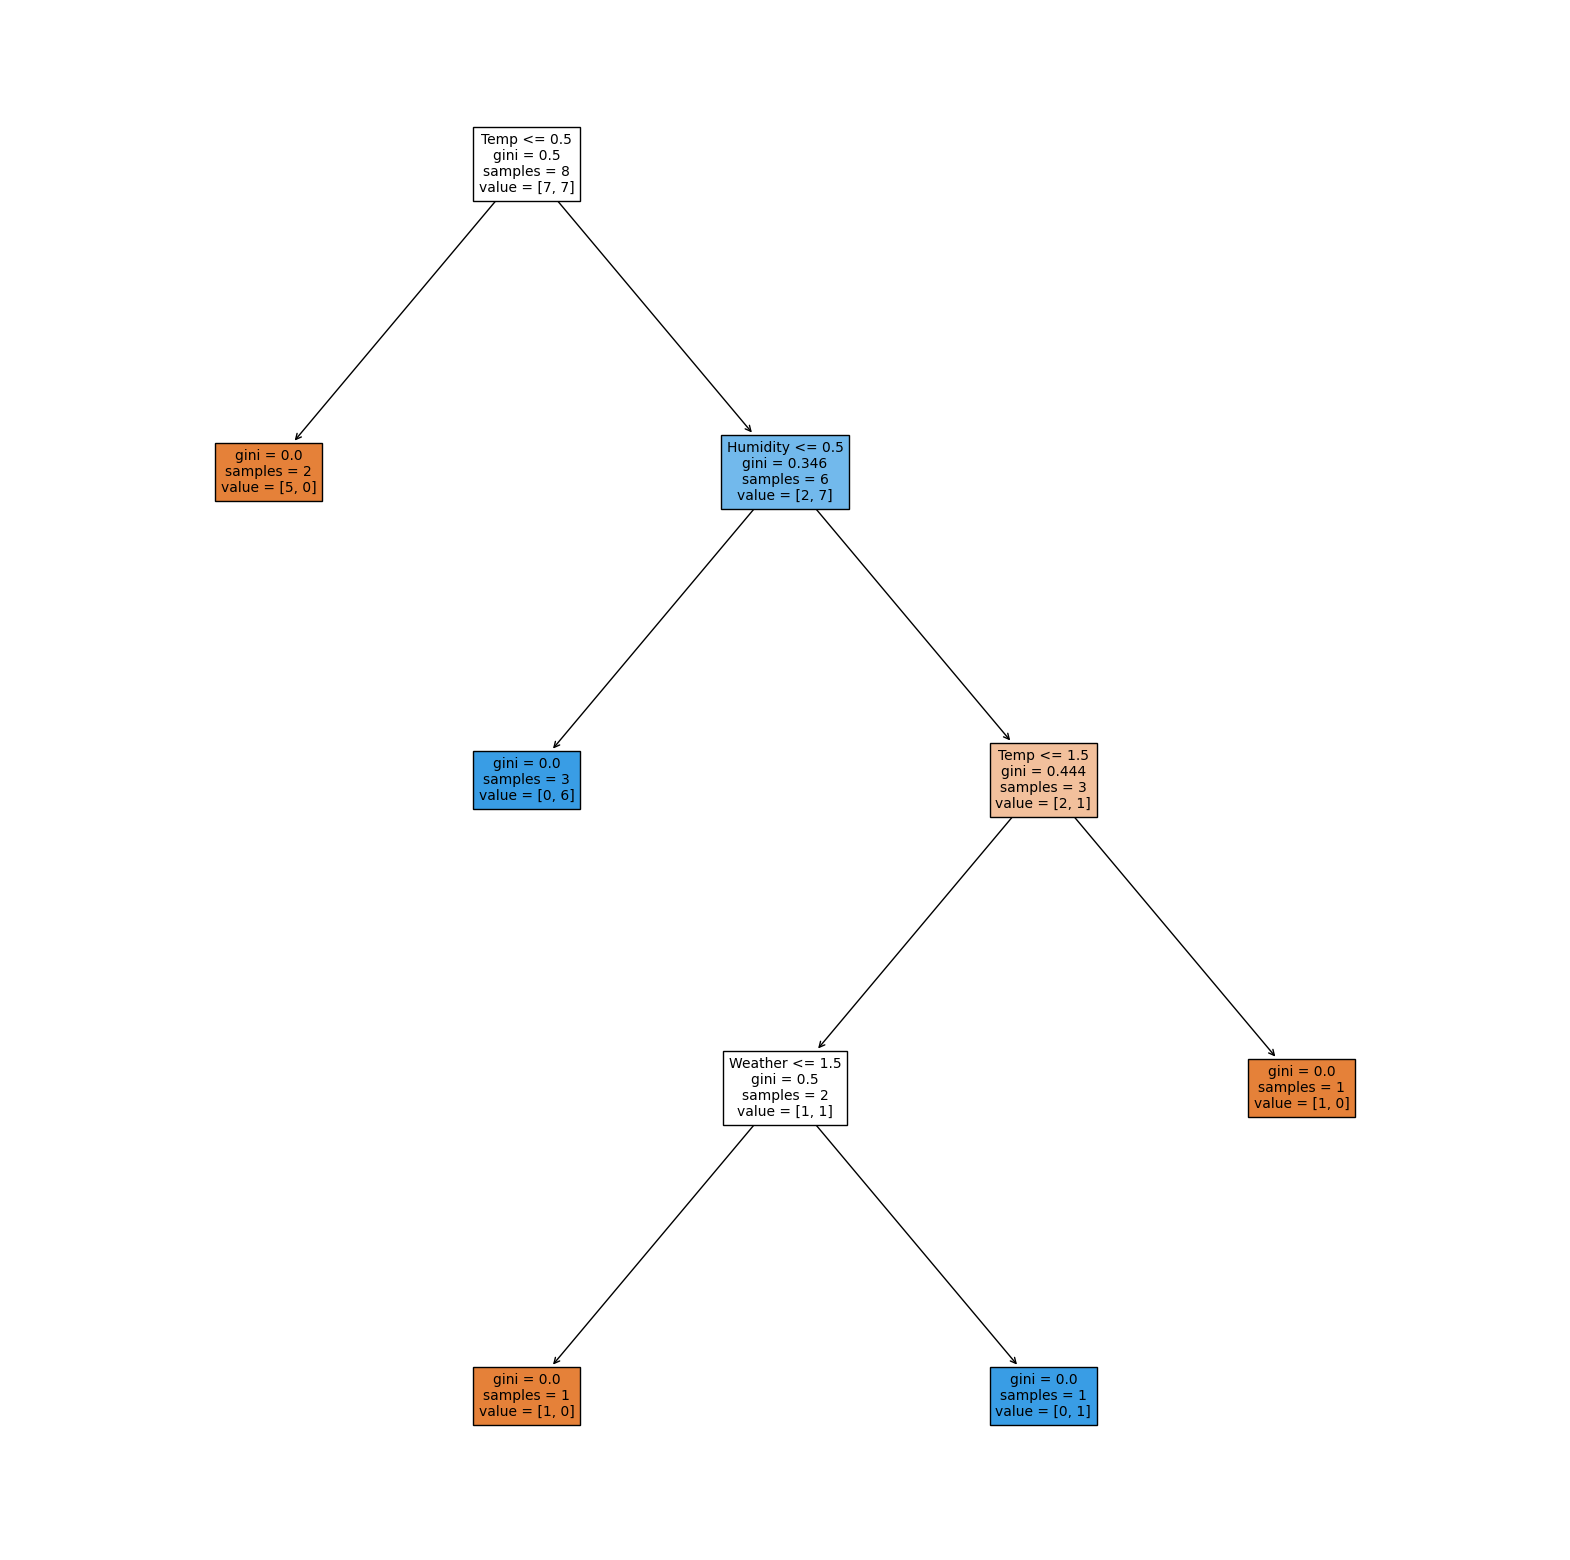

In [14]:
plt.figure(figsize=(20,20))
plot_tree(rf[0], filled=True, fontsize=10, feature_names=data.columns.tolist())
plt.show()
# we can see each tree separately
# 0-tree
# Note that it first checks for temp<=0.5 and then proceeds accordingly

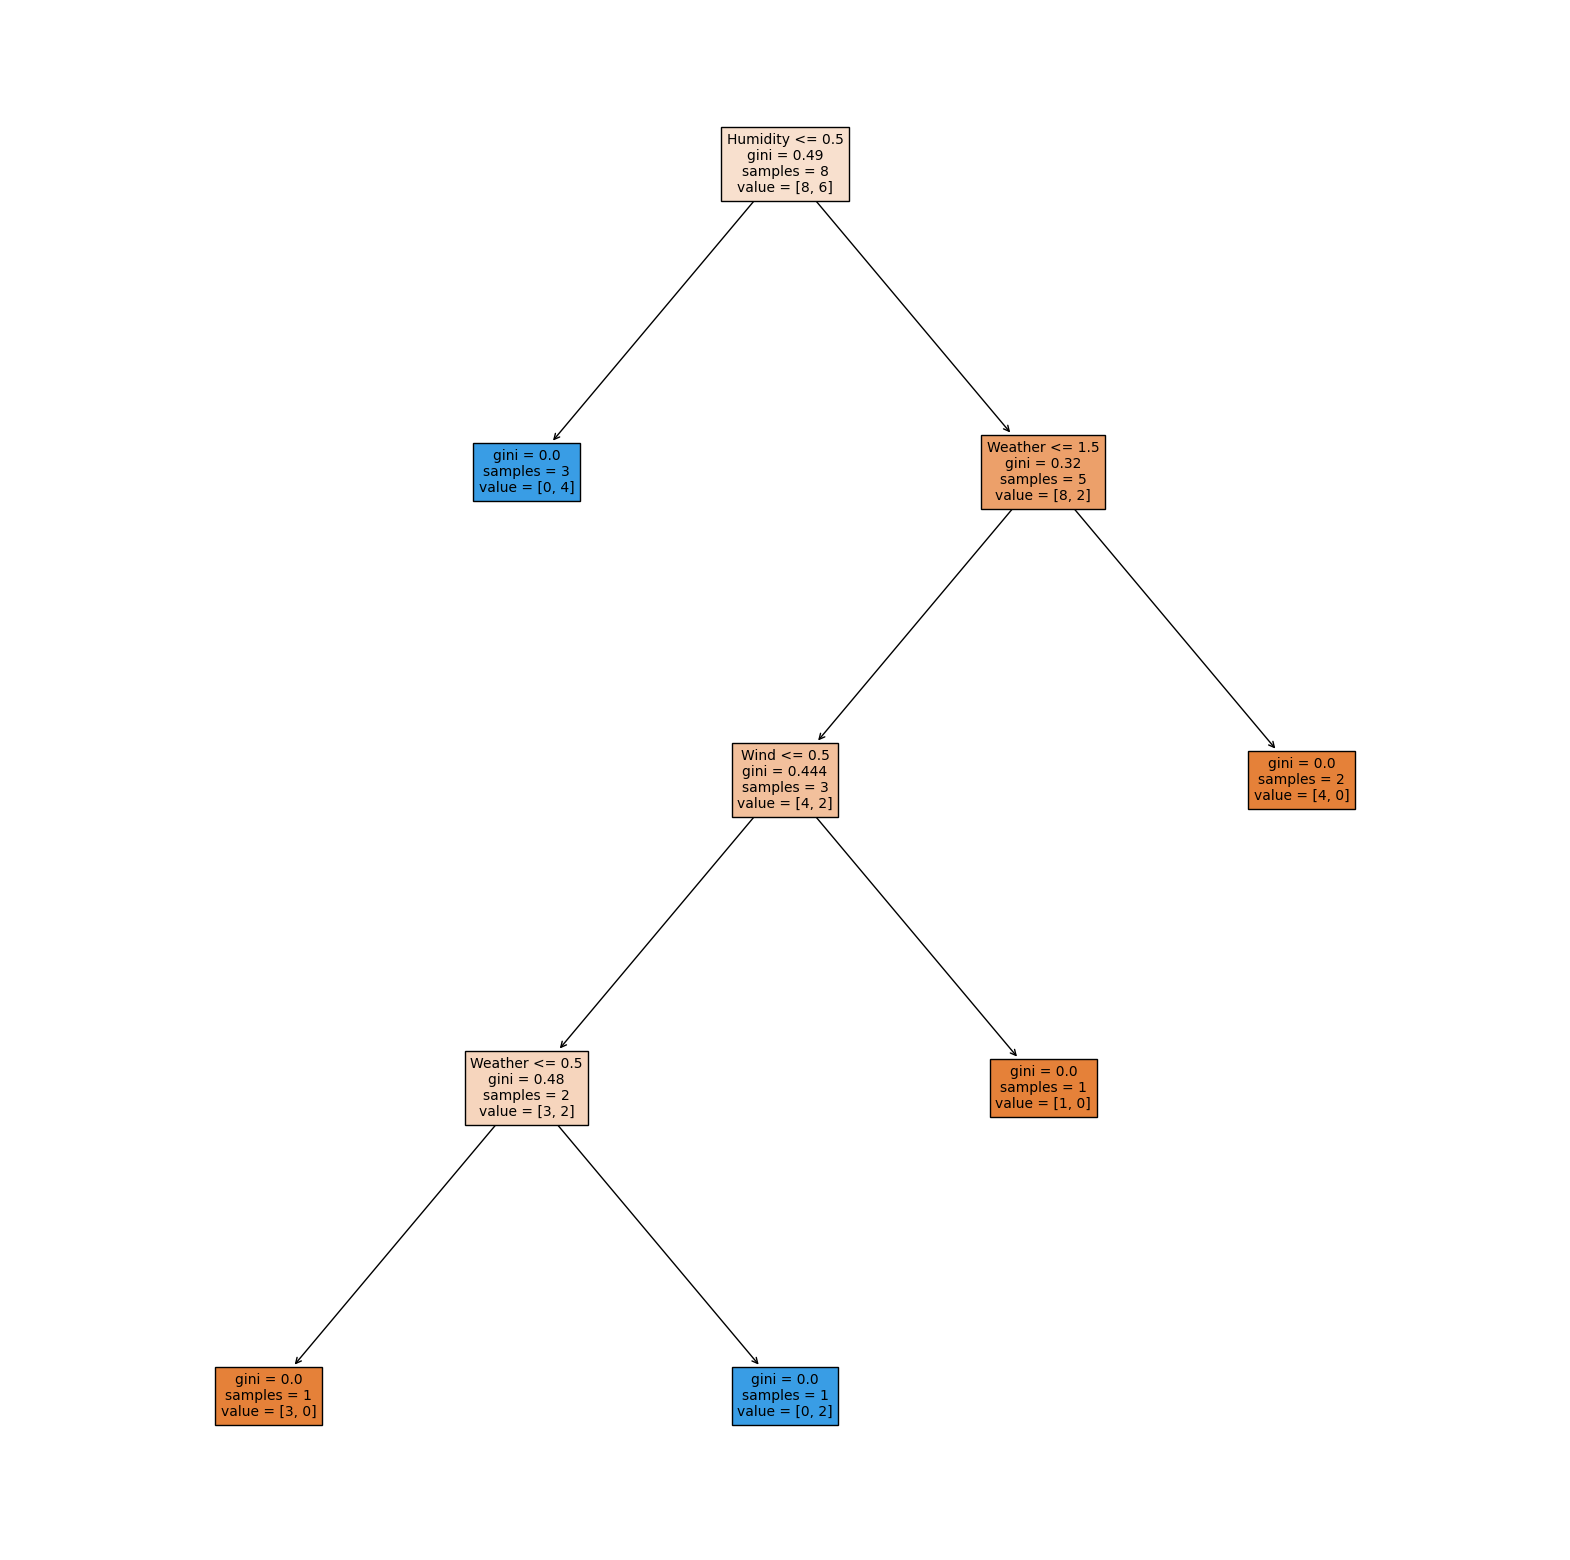

In [16]:
plt.figure(figsize=(20,20))
plot_tree(rf[1], filled=True, fontsize=10, feature_names=data.columns.tolist())
plt.show()
# 1 tree
# this tree checks for temp<=0.5 instead of humidity<=0.5 like tree 0 and then continues accordingly

# Let's make the number of trees 5

In [17]:
rf = RandomForestClassifier(n_estimators=5)

In [18]:
rf.fit(data_x, data["Players"])

RandomForestClassifier(n_estimators=5)

In [19]:
rf[0]
# 0 - tree

DecisionTreeClassifier(max_features='sqrt', random_state=1846218927)

In [20]:
rf[1]
# 1 - tree

DecisionTreeClassifier(max_features='sqrt', random_state=645285592)

In [21]:
rf[2]
# 2 - tree

DecisionTreeClassifier(max_features='sqrt', random_state=899070891)

In [22]:
rf[3]
# 3 - tree

DecisionTreeClassifier(max_features='sqrt', random_state=1823860986)

In [23]:
rf[4]
# 4 - tree

DecisionTreeClassifier(max_features='sqrt', random_state=14813663)

In [24]:
len(rf)

5

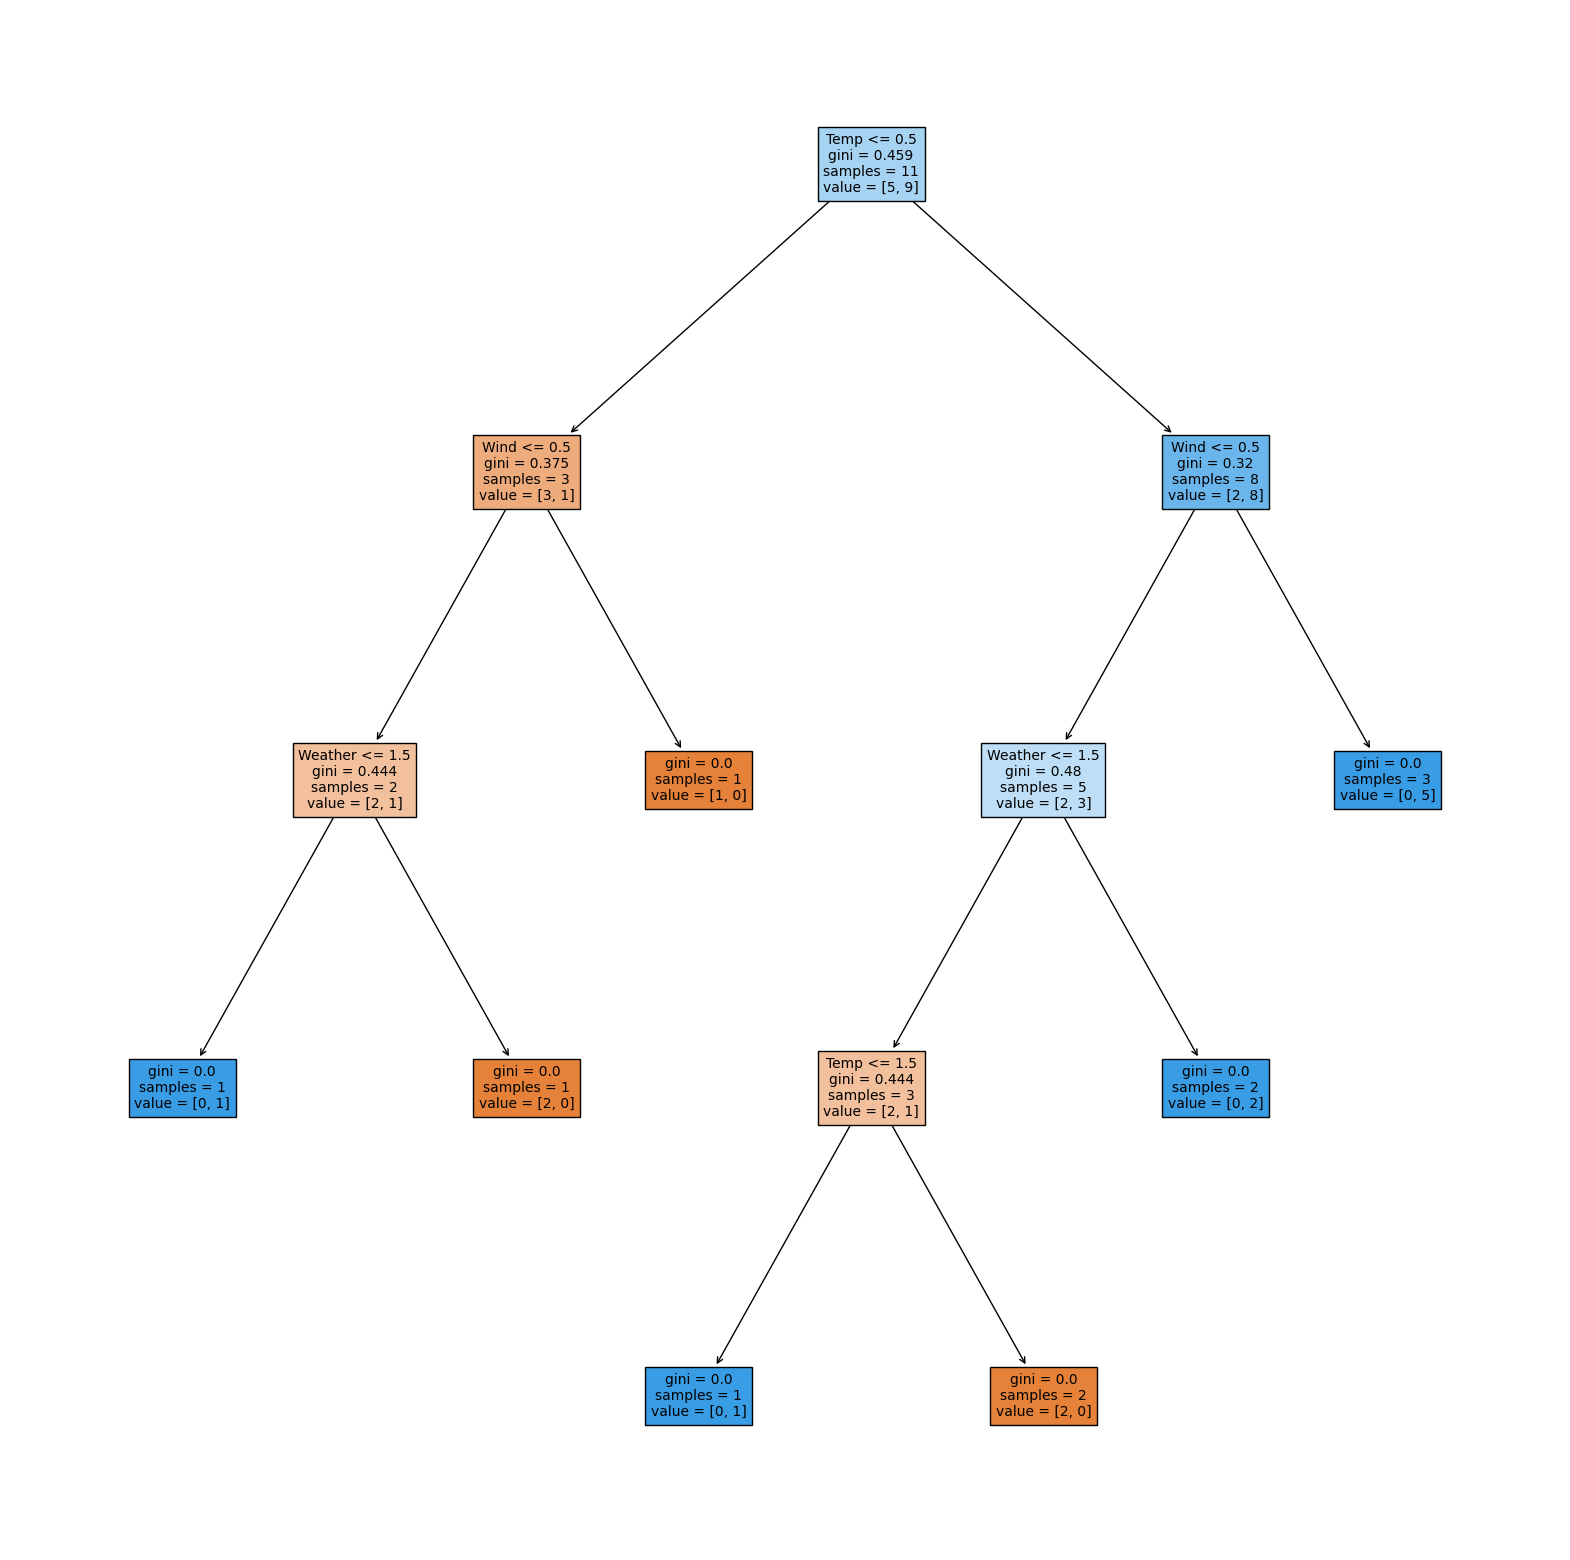

In [26]:
plt.figure(figsize=(20,20))
plot_tree(rf[0], filled=True, fontsize=10, feature_names=data.columns.tolist())
plt.show()
# 0 - tree

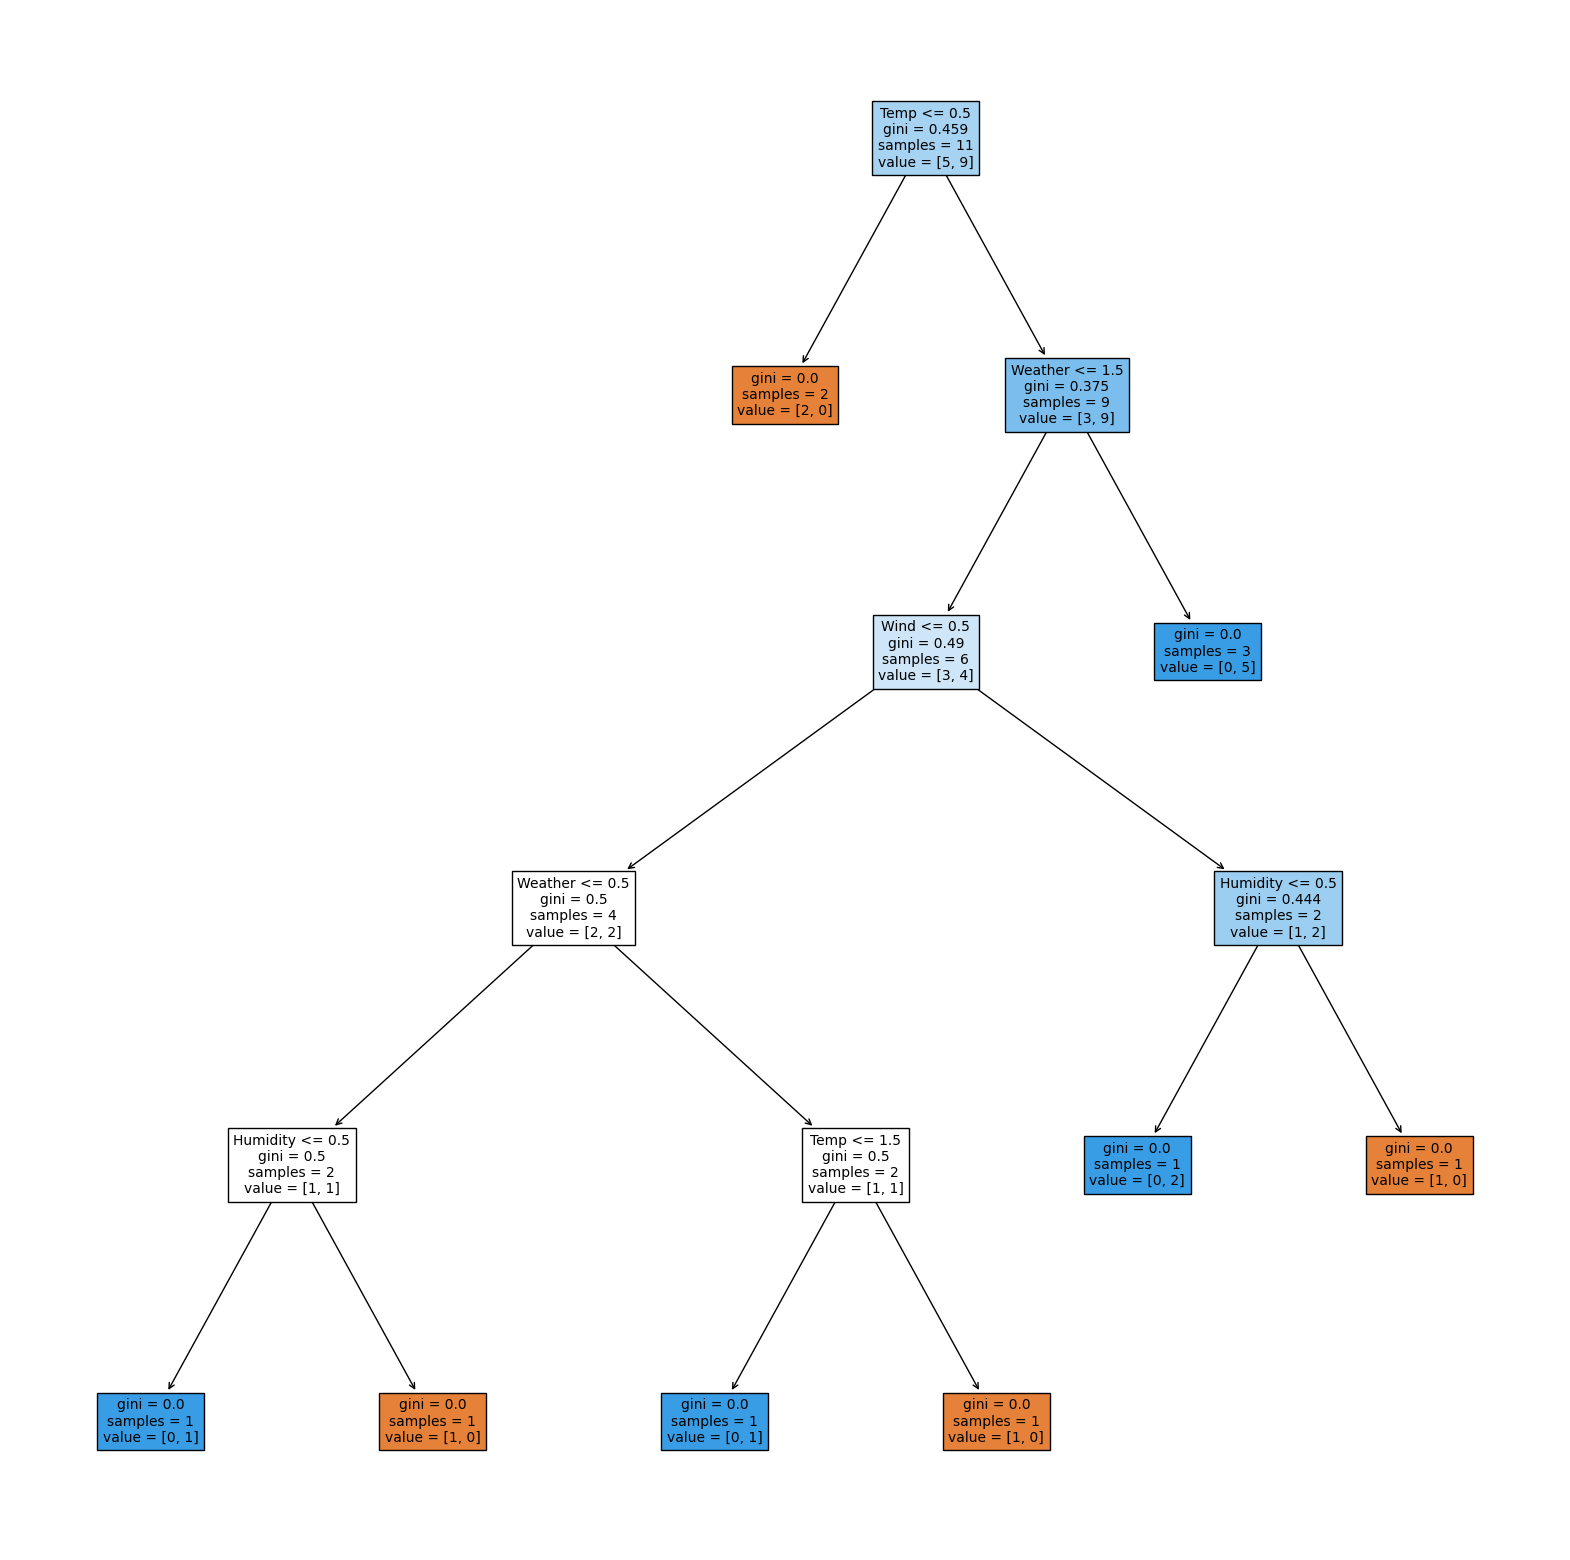

In [27]:
plt.figure(figsize=(20,20))
plot_tree(rf[1], filled=True, fontsize=10, feature_names=data.columns.tolist())
plt.show()
# 1 - tree

# We will check
`Let's check by giving the 1st value in our data, its class=0`

In [28]:
data_x[0]

array([1., 2., 0., 0.])

In [29]:
data["Players"][0]
# therefore, data 1 belongs to class 0

0

In [30]:
data.loc[0]

Weather     Rainy
Temp          Hot
Humidity     High
Wind        False
Players         0
Name: 0, dtype: object

In [31]:
rf[0].predict([data_x[0]])
# Tree 0. It says that data 1 belongs to class 0, which is correct

array([0.])

In [32]:
rf[1].predict([data_x[0]])
# Tree 1. It says that data 1 belongs to class 0, which is correct


array([0.])

In [33]:
rf[2].predict([data_x[0]])
# Tree 2. It says that data 1 belongs to class 0, which is correct


array([0.])

In [34]:
rf[3].predict([data_x[0]])
# Tree 3. It says data 1 belongs to class 1, which is wrong


array([1.])

In [35]:
rf[4].predict([data_x[0]])
# Tree 4. It says that data 1 belongs to class 0, which is correct

array([0.])

In [36]:
rf.predict([data_x[0]])
# also in the shared tree. It is true that the 1st data belongs to the 0th class
# because 4 out of 5 trees say data 1 belongs to class 0 and 1 says it belongs to class 1


array([0], dtype=int64)

In [37]:
data_x[0]

array([1., 2., 0., 0.])

In [38]:
data.loc[0]

Weather     Rainy
Temp          Hot
Humidity     High
Wind        False
Players         0
Name: 0, dtype: object

In [39]:
data_x[0]

array([1., 2., 0., 0.])

In [40]:
rf[0].predict([data_x[0]])

array([0.])

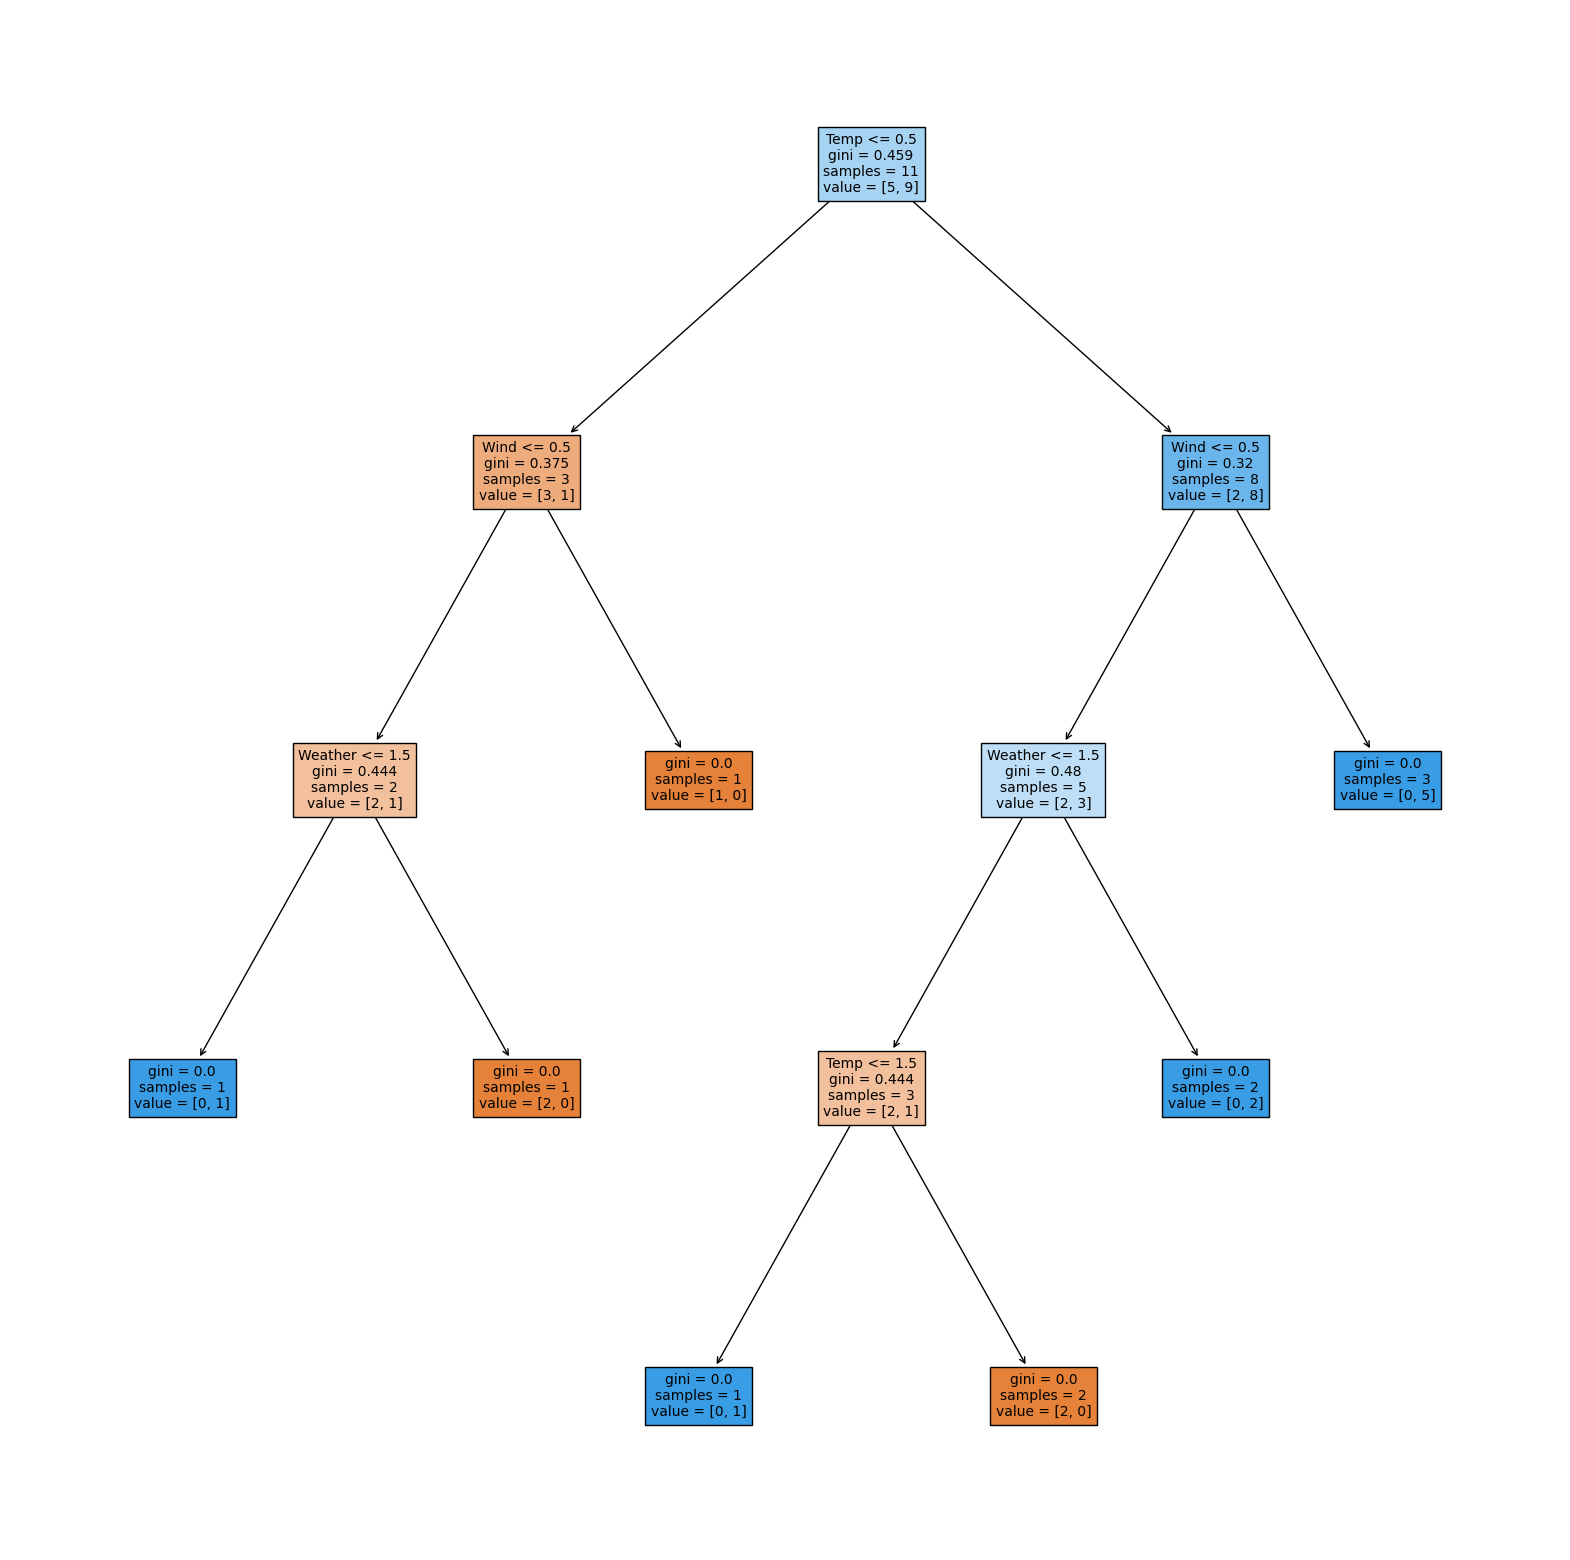

In [42]:
plt.figure(figsize=(20,20))
plot_tree(rf[0], filled=True, fontsize=10, feature_names=data.columns.tolist())
plt.show()

# 1 is checking temp<=0.5 and we have 2 so we are going to the right
# 2nd, wind<=0.5 is checked, and we have 0, so we go left
# 3rdly weather<=1.5 is checked and we have 1 so we go left
# 4th, temp<=1.5 is being checked, and we have 2, so we go to the right
# 5th sample 2 says that they both belong to 0-class
# Working properly

# <center> Random Forest Regressor

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
data = pd.read_csv("Datasets/DTree2.csv")
data

,Weather,Temp,Humidity,Wind,Players
0,Rainy,Hot,High,False,25
1,Rainy,Hot,High,True,30
2,Cloudy,Hot,High,False,46
3,Sunny,Good,High,False,45
4,Sunny,Cool,Normal,False,52
5,Sunny,Cool,Normal,True,23
6,Cloudy,Cool,Normal,True,43
7,Rainy,Good,High,False,35
8,Rainy,Cool,Normal,False,38
9,Sunny,Good,Normal,False,46


In [45]:
rf = RandomForestRegressor(n_estimators=5)

In [46]:
ordinal = OrdinalEncoder()
ordinal
# we use to encode data

OrdinalEncoder()

In [47]:
data_x = ordinal.fit(data.drop("Players", axis=1))
data_x

OrdinalEncoder()

In [48]:
data_x = ordinal.transform(data.drop("Players", axis=1))
data_x
# We encoded the data

array([[1., 2., 0., 0.],
       [1., 2., 0., 1.],
       [0., 2., 0., 0.],
       [2., 1., 0., 0.],
       [2., 0., 1., 0.],
       [2., 0., 1., 1.],
       [0., 0., 1., 1.],
       [1., 1., 0., 0.],
       [1., 0., 1., 0.],
       [2., 1., 1., 0.],
       [1., 1., 1., 1.],
       [0., 1., 0., 1.],
       [0., 2., 1., 0.],
       [2., 1., 0., 1.]])

In [49]:
rf.fit(data_x, data["Players"])

RandomForestRegressor(n_estimators=5)

In [50]:
rf[0].predict([data_x[0]])

array([25.])

In [51]:
data

,Weather,Temp,Humidity,Wind,Players
0,Rainy,Hot,High,False,25
1,Rainy,Hot,High,True,30
2,Cloudy,Hot,High,False,46
3,Sunny,Good,High,False,45
4,Sunny,Cool,Normal,False,52
5,Sunny,Cool,Normal,True,23
6,Cloudy,Cool,Normal,True,43
7,Rainy,Good,High,False,35
8,Rainy,Cool,Normal,False,38
9,Sunny,Good,Normal,False,46


In [52]:
data.loc[0]

Weather     Rainy
Temp          Hot
Humidity     High
Wind        False
Players        25
Name: 0, dtype: object

In [53]:
data_x[0]

array([1., 2., 0., 0.])

In [54]:
rf[0].predict([data_x[0]])

array([25.])

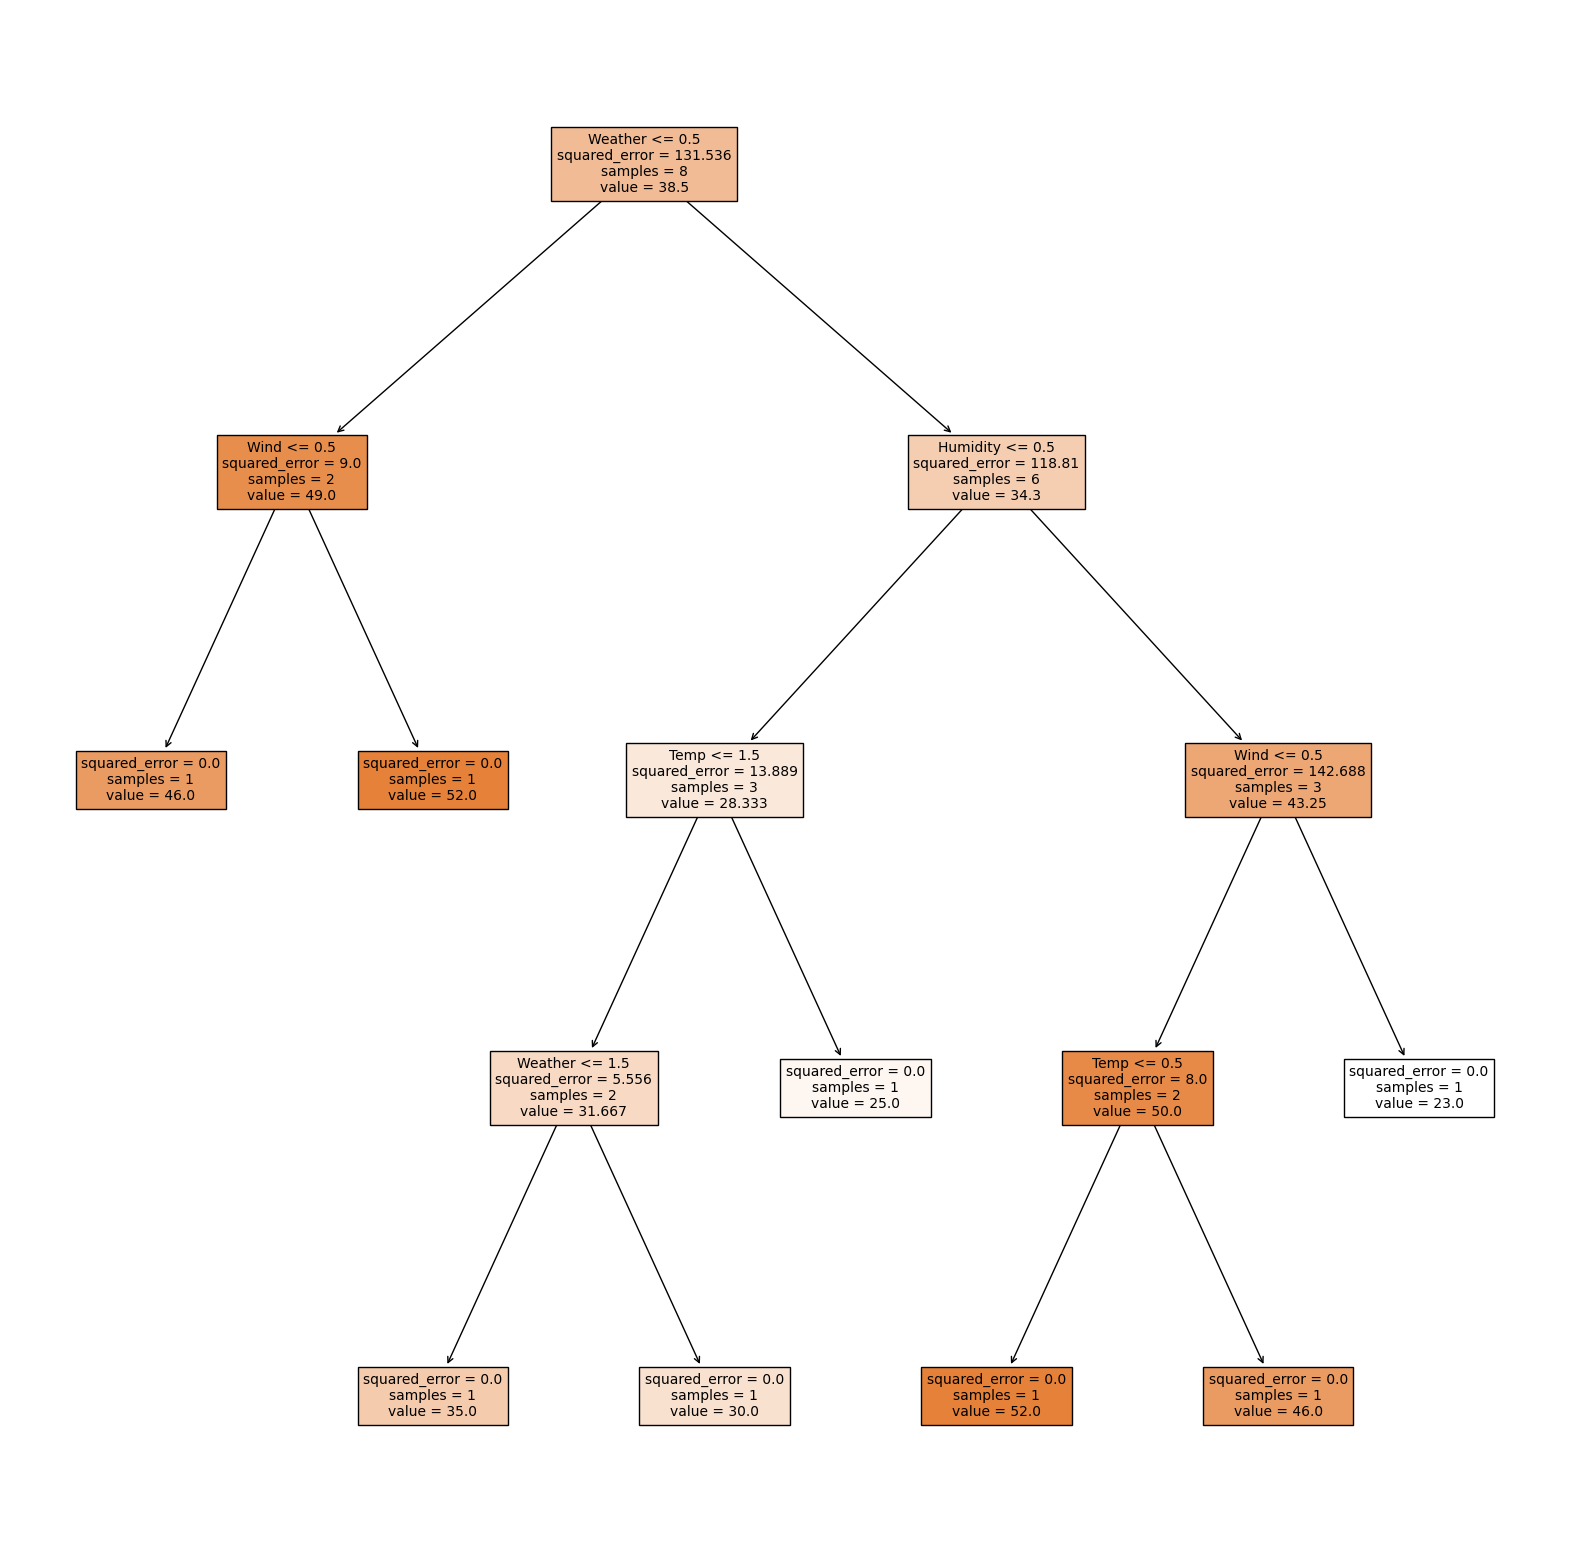

In [56]:
plt.figure(figsize=(20,20))
plot_tree(rf[0], filled=True, fontsize=10, feature_names=data.columns.tolist())
plt.show()

# 1 is checking weather<=0.5 and we have 1 so we are going to the right
# 2nd, humidity<=0.5 is checked, and we have 0, so we go left
# 3rd, temp<=1.5 is checked, and we have 2, so we go right
# We can see that the answer is 25
# Correct


In [57]:
rf = RandomForestRegressor(n_estimators=5, min_samples_leaf=3)
# min_samples_leaf = 3 is the minimum number of samples on the branch at the end


In [58]:
rf.fit(data_x, data["Players"])

RandomForestRegressor(min_samples_leaf=3, n_estimators=5)

In [59]:
rf[0].predict([data_x[0]])

array([37.85714286])

In [60]:
rf[1].predict([data_x[0]])

array([35.66666667])

In [61]:
rf[2].predict([data_x[0]])

array([30.])

In [62]:
rf[3].predict([data_x[0]])

array([36.75])

In [63]:
rf[4].predict([data_x[0]])

array([38.8])

In [65]:
# we have ( rf[0] + rf[1] + rf[2] + rf[3] + rf[4] ) / 5 = rf(common)
(37.85714286 + 35.66666667 + 30. + 36.75 + 38.8) / 5
# in random forest, the predictions made by all trees are added and divided by the length of the tree

35.814761906

In [66]:
rf.predict([data_x[0]])

array([35.8147619])

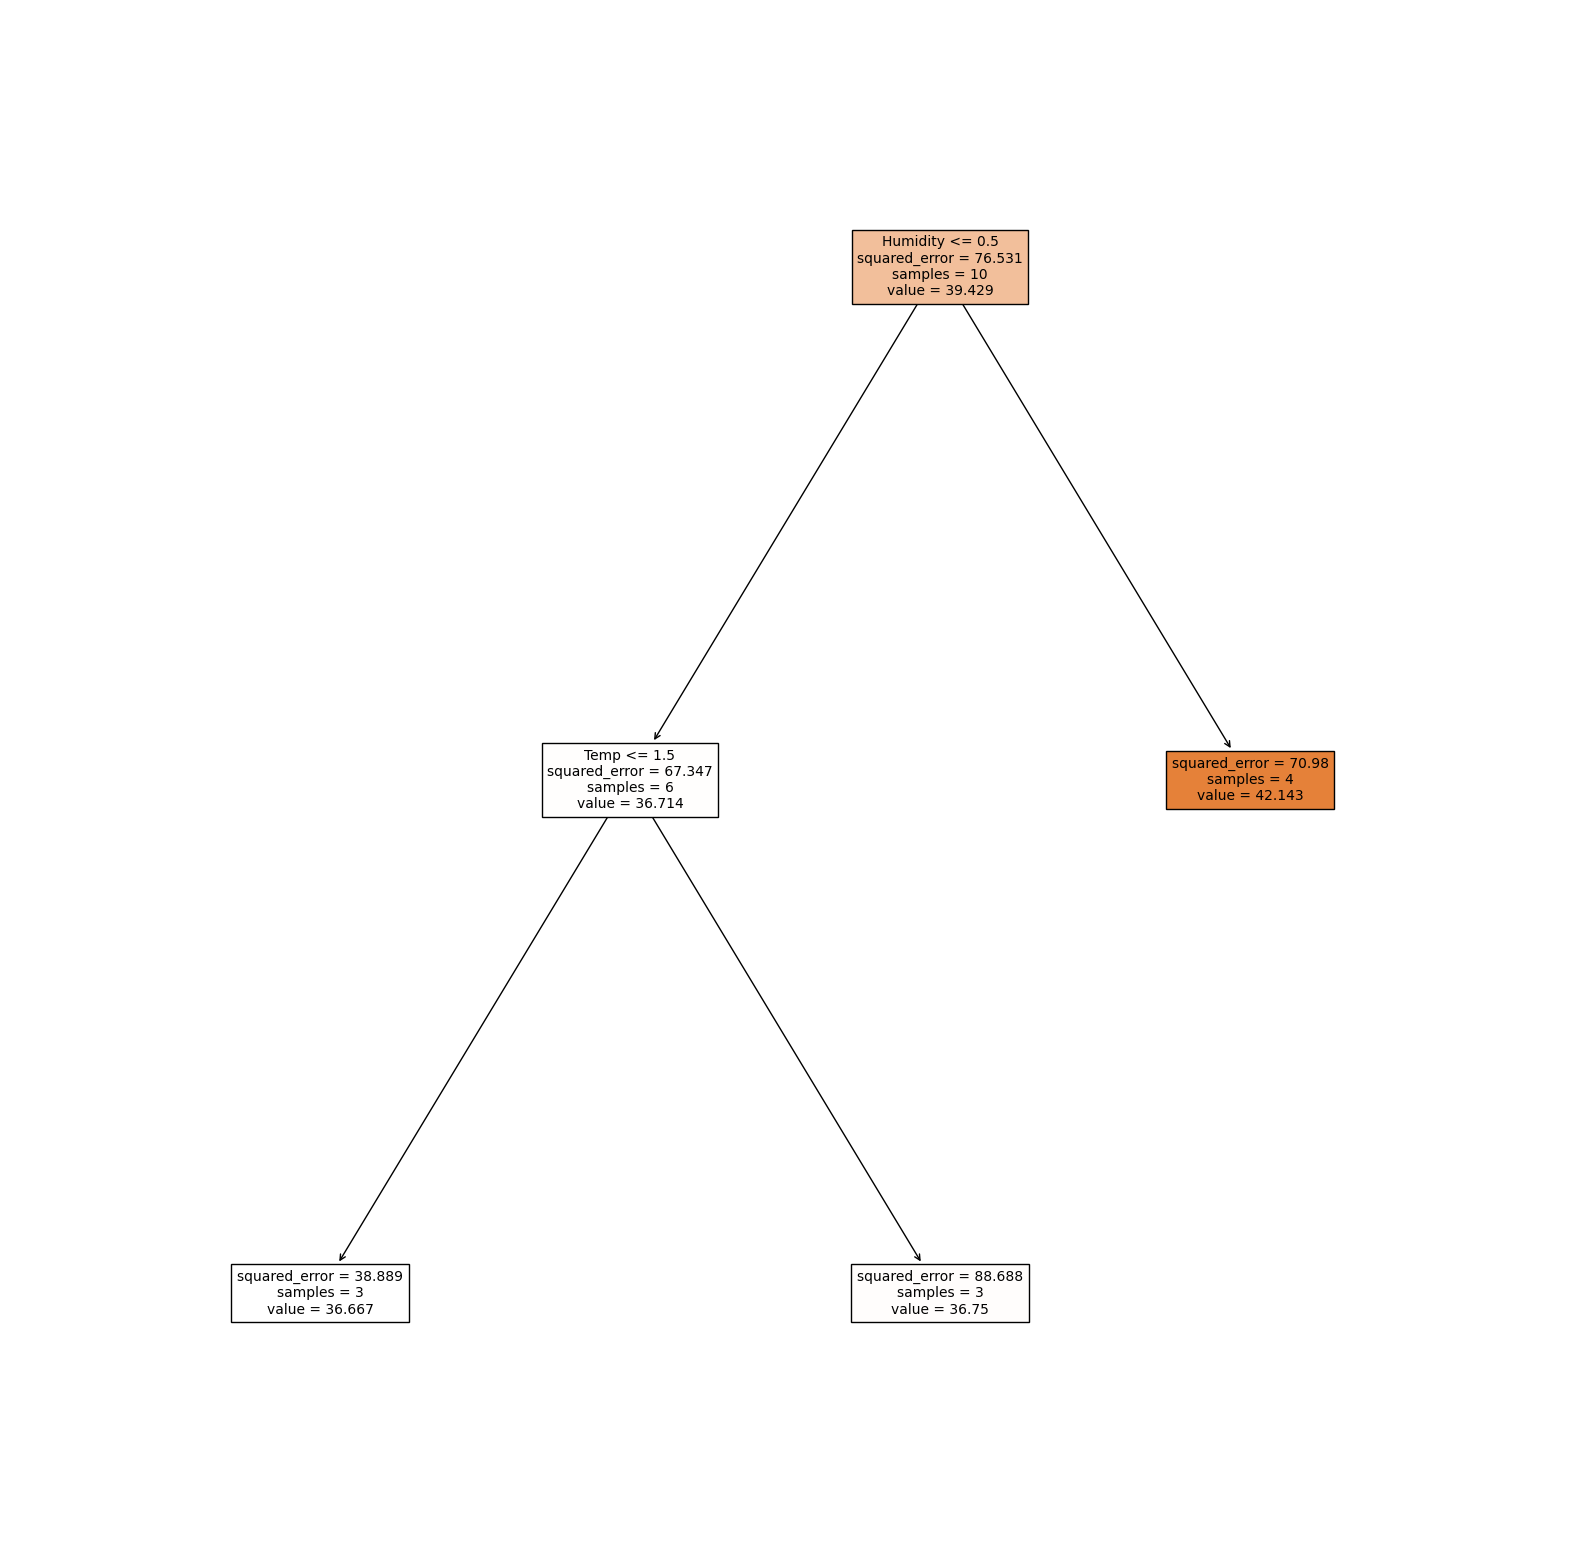

In [69]:
plt.figure(figsize=(20,20))
plot_tree(rf[3], filled=True, fontsize=10, feature_names=data.columns.tolist())
plt.show()
# if we pay attention, the minimum number of samples in the last branch is at least=3


# <center> <h1> 👨‍💻   🚀  